##IPython Widgets
IPython widgets are tools that give us interactivity within our analysis. This is most useful when looking at a complication plot and trying to figure out how it depends on a single parameter. You could make 20 different plots and vary the parameter a bit each time, or you could use an IPython slider widget. Let's first import the widgets.

In [7]:
import IPython.html.widgets as widg
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline


The object we will learn about today is called interact. Let's find out how to use it.

In [8]:
widg.interact?

We see that we need a function with parameters that we want to vary, let's make one. We will examine the lorenz equations. They exhibit chaotic behaviour and are quite beautiful.

In [12]:
def lorentz_derivs(yvec, t, sigma, rho, beta):
    """Compute the the derivatives for the Lorentz system at yvec(t)."""
    dx = sigma*(yvec[1]-yvec[0])
    dy = yvec[0]*(rho-yvec[2])-yvec[1]
    dz = yvec[0]*yvec[1]-beta*yvec[2]
    return [dx,dy,dz]
def solve_lorentz(ic, max_time=4.0, sigma=10.0, rho=28.0, beta=8.0/3.0):
    """Solve the Lorenz system for a single initial condition.
    
    Parameters
    ----------
    ic : array, list, tuple
        Initial conditions [x,y,z].
    max_time: float
        The max time to use. Integrate with 250 points per time unit.
    sigma, rho, beta: float
        Parameters of the differential equation.
        
    Returns
    -------
    soln : np.ndarray
        The array of the solution. Each row will be the solution vector at that time.
    t : np.ndarray
        The array of time points used.
    
    """
    t = np.linspace(0,max_time, max_time*250)
    return odeint(lorentz_derivs, ic, t, args = (sigma, rho, beta)), t

In [15]:
def plot_lorentz(N=1, max_time=4.0, sigma=10.0, rho=28.0, beta=8.0/3.0):
    """Plot [x(t),z(t)] for the Lorenz system.
    
    Parameters
    ----------
    N : int
        Number of initial conditions and trajectories to plot.
    max_time: float
        Maximum time to use.
    sigma, rho, beta: float
        Parameters of the differential equation.
    """
    f = plt.figure(figsize=(15, N*8))
    np.random.seed(1)
    colors = plt.cm.hot(np.linspace(0,1,N))
    for n in range(N):
        plt.subplot(N,1,n)
        x0 = np.random.uniform(-15, 15)
        y0 = np.random.uniform(-15, 15)
        z0 = np.random.uniform(-15, 15)
        soln, t = solve_lorentz([x0,y0,z0], max_time, sigma, rho, beta)
        plt.plot(soln[:,0], soln[:, 2], color=colors[n])

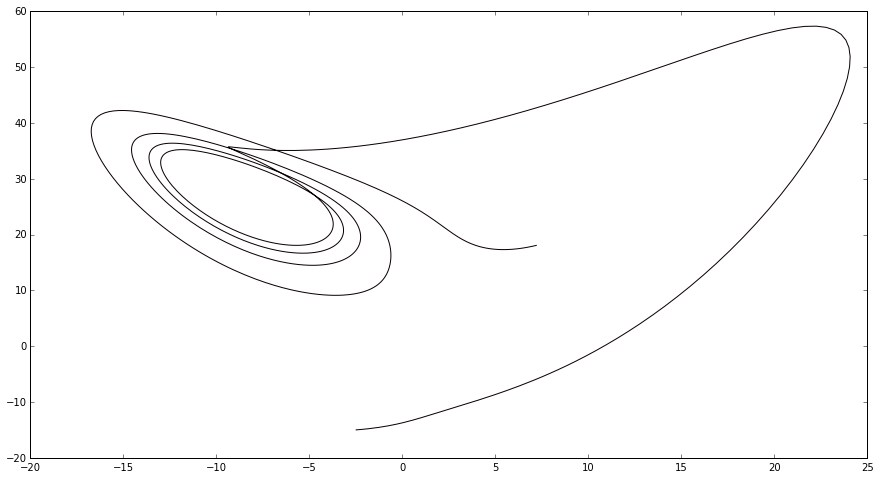

In [16]:
plot_lorentz()

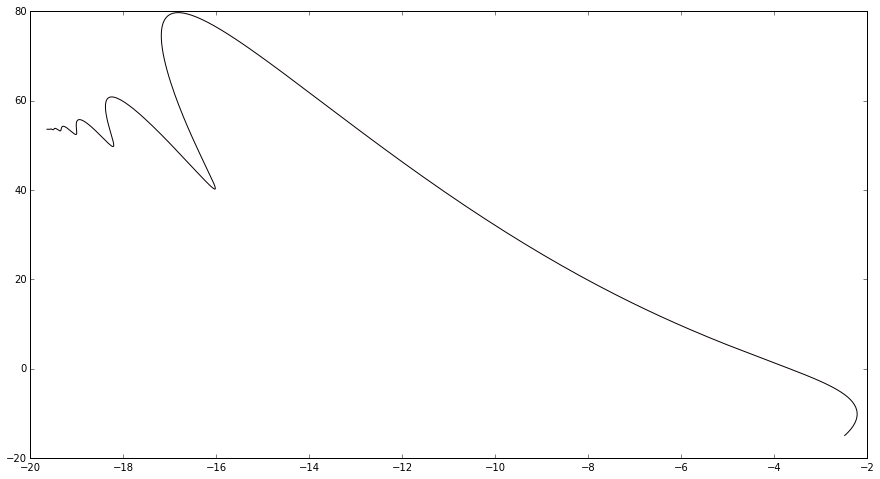

In [17]:
widg.interact(plot_lorentz, N=1, max_time=(0,10,.1), sigma=(0,10,.1), rho=(0,100, .1), beta=(0,10,.1))

Okay! So now you are ready to analyze the world! Just kidding. Let's make a simpler example. Consider the best fitting straight line through a set of points. When a curve fitter fits a straight line, it tries to minimize the sum of the "errors" from all the data points and the fit line. Mathematically this is represented as

$$\sum_{i=0}^{n}(f(x_i)-y_i)^2$$

Now, $f(x_i)=mx_i+b$. Your task is to write a function that plots a line and prints out the error, make an interact that allows you to vary the m and b parameters, then vary those parameters until you find the smallest error.

In [43]:
#Make a function that takes two parameters m and b and prints the total error and plots the the line and the data.
#Use this x and y into your function to use as the data
x=np.linspace(0,1,10)
y=(np.random.rand(10)+4)*x+5

In [45]:
#Make an interact as above that allows you to vary m and b.
